#Ensemble Learning Assignment Answers

## Theoretical Questions

1. Can we use Bagging for regression problems?

Yes, Bagging can be used for regression problems. It works by training multiple base regressors (e.g., Decision Trees) on different bootstrap samples and averaging their predictions to reduce variance and improve accuracy. This is implemented in scikit-learn’s BaggingClassifierBaggingRegressor.

2. What is the difference between multiple model training and single model training?

Multiple Model Training: Involves training several models (e.g., in ensemble methods like Bagging or Boosting) and combining their predictions (e.g., by voting or averaging). to reduce variance, improve robustness, and enhance generalization.
Single Model Training: Trains a single model (e.g., one Decision Tree or SVM) on the entire dataset. It’s simpler but more prone to overfitting or underfitting, depending on the model complexity and data.

3. Explain the concept of feature randomness in Random Forest SVM?

Feature randomness in Random Forest refers to selecting a random subset of features at each node split during tree construction. Unlike a single Decision Tree, which considers all features for the best split, Random Forest limits the feature set to increase diversity among trees, reduce correlation, and improve generalization. This is controlled by parameters like max_features in scikit-learn.

4. What is OOB (Out-of-Bag) Score?

The Out-of-Bag (OOB) Score is an estimate of a Random Forest’s performance using samples not included in the bootstrap sample for each tree. Since Bagging uses bootstrap sampling, about 1/3 of the data is left out (OOB samples) for each tree. The OOB score aggregates predictions from trees where a sample was OOB, providing a validation metric without needing a separate test set.

5. How can you measure the importance of features in a Random Forest model?

Feature importance in Random Forest is measured by:

Mean Decrease in Impurity: Sum the reduction in impurity (e.g., Gini or Entropy) caused by splits on a feature across all trees, normalized by the number of trees.
Mean Decrease in Accuracy: Permute a feature’s values and measure the drop in OOB accuracy; higher drop indicates higher importance.In scikit-learn, feature_importances_ provides impurity-based importance scores.

6. Explain the working principle of a Bagging Classifier.

A Bagging Classifier works by:

Creating multiple bootstrap samples (random subsets with replacement) from the training data.
Training a base classifier (e.g., Decision Tree) on each bootstrap sample independently.
Aggregating predictions from all classifiers via majority voting for classification.This reduces variance, improves stability, and mitigates overfitting by averaging out errors from individual models.

7. How do you evaluate a Bagging Classifier's performance?

A Bagging Classifier’s performance is evaluated using:

Accuracy: Proportion of correct predictions on a test set.
Precision, Recall, F1-Score: For imbalanced datasets or specific class focus.
ROC-AUC: For probabilistic predictions or binary classification.
Cross-Validation: To assess generalization across data splits.
Confusion Matrix: To analyze misclassifications.Use scikit-learn’s accuracy_score, classification_report, or cross_val_score for these metrics.

8. How does a Bagging Regressor work?

A Bagging Regressor works by:

Generating multiple bootstrap samples from the training data.
Training a base regressor (e.g., Decision Tree) on each sample.
Aggregating predictions by averaging the outputs of all regressors.This reduces variance, smooths predictions, and improves robustness compared to a single regressor.

9. What is the main advantage of ensemble techniques?

The main advantage of ensemble techniques is improved predictive performance through combining multiple models, reducing variance (Bagging), bias (Boosting), or both (Stacking). This leads to better generalization, robustness to noise, and higher accuracy than single models.

10. What is the main challenge of ensemble methods?

The main challenge is computational complexity. Ensemble methods require training multiple models, increasing time and resource demands. They can also be harder to interpret (e.g., Random Forest vs. a single Decision Tree) and may require careful tuning to avoid overfitting or underfitting.

11. Explain the key idea behind ensemble techniques.

The key idea is to combine predictions from multiple models to achieve better performance than any single model. By leveraging diversity (different models, data subsets, or features), ensembles reduce errors through averaging (Bagging), sequential improvement (Boosting), or stacking, exploiting the “wisdom of the crowd.”

12. What is a Random Forest Classifier?

A Random Forest Classifier is an ensemble method that combines multiple Decision Trees trained on bootstrap samples of the data, with random feature subsets at each split. Predictions are made by majority voting across trees, reducing overfitting and improving accuracy compared to a single Decision Tree.

13. What are the main types of ensemble techniques?

Bagging: Trains models in parallel on bootstrap samples (e.g., Random Forest).
Boosting: Trains models sequentially, focusing on errors of previous models (e.g., AdaBoost, Gradient Boosting).
Stacking: Combines predictions from multiple models using a meta-learner.
Voting: Aggregates predictions via majority voting (classification) or averaging (regression).

14. What is ensemble learning in machine learning?

Ensemble learning is a machine learning approach that combines predictions from multiple models to improve accuracy, robustness, and generalization. It leverages diverse models or data subsets to reduce bias, variance, or both, outperforming individual models.

15. When should we avoid using ensemble methods?

Avoid ensemble methods when:

Computational resources are limited, as they are resource-intensive.
Interpretability is critical, as ensembles are less transparent than single models.
Data is insufficient, as ensembles may overfit small datasets.
Problem is simple, where a single model (e.g., linear regression) suffices.
Real-time predictions are needed, due to higher inference time.

16. How does Bagging help in reducing overfitting?

Bagging reduces overfitting by:

Training models on different bootstrap samples, introducing diversity and reducing reliance on specific data points.
Averaging predictions (regression) or voting (classification), which smooths out noise and errors from individual models.
Lowering variance, as the ensemble is less sensitive to outliers or fluctuations in the training data.

17. Why is Random Forest better than a single Decision Tree?

Random Forest is better because:

Reduces Overfitting: Combines multiple trees, averaging out individual errors.
Increases Diversity: Uses bootstrap sampling and feature randomness, making trees less correlated.
Improves Accuracy: Aggregates predictions for more robust results.
Handles Noise: Less sensitive to outliers or irrelevant features.
Feature Importance: Provides insights into feature contributions.

18. What is the role of bootstrap sampling in Bagging?

Bootstrap sampling creates random subsets of the training data by sampling with replacement, typically of the same size as the original dataset. In Bagging, it:

Generates diverse training sets for each base model.
Reduces variance by ensuring models are trained on varied data.
Enables OOB evaluation by leaving out unsampled data.

19. What are some real-world applications of ensemble techniques?

Finance: Credit risk assessment, fraud detection.
Healthcare: Disease diagnosis, patient outcome prediction.
Marketing: Customer segmentation, churn prediction.
Image Recognition: Object detection, facial recognition.
Natural Language Processing: Sentiment analysis, text classification.
Recommendation Systems: Personalized product suggestions.

20. What is the difference between Bagging and Boosting?

Bagging:
Trains models in parallel on bootstrap samples.
Reduces variance by averaging or voting.
Models are independent (e.g., Random Forest).
Less prone to overfitting.


Boosting:
Trains models sequentially, focusing on errors of previous models.
Reduces bias and variance by weighting misclassified samples.
Models are dependent (e.g., Gradient Boosting, AdaBoost).
More prone to overfitting if not tuned properly.





In [1]:
#Practical Questions

#21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Bagging Classifier with Decision Trees
clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                        n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")

Bagging Classifier Accuracy: 1.0000


In [2]:
#22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Regressor with Decision Trees
reg = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                       n_estimators=10, random_state=42)
reg.fit(X_train, y_train)

# Predict and evaluate MSE
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Regressor MSE: {mse:.4f}")

Bagging Regressor MSE: 0.2862


In [3]:
#23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Print feature importance scores
print("Feature Importance Scores:")
for feature, importance in zip(data.feature_names, clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

Feature Importance Scores:
mean radius: 0.0323
mean texture: 0.0111
mean perimeter: 0.0601
mean area: 0.0538
mean smoothness: 0.0062
mean compactness: 0.0092
mean concavity: 0.0806
mean concave points: 0.1419
mean symmetry: 0.0033
mean fractal dimension: 0.0031
radius error: 0.0164
texture error: 0.0032
perimeter error: 0.0118
area error: 0.0295
smoothness error: 0.0059
compactness error: 0.0046
concavity error: 0.0058
concave points error: 0.0034
symmetry error: 0.0040
fractal dimension error: 0.0071
worst radius: 0.0780
worst texture: 0.0188
worst perimeter: 0.0743
worst area: 0.1182
worst smoothness: 0.0118
worst compactness: 0.0175
worst concavity: 0.0411
worst concave points: 0.1271
worst symmetry: 0.0129
worst fractal dimension: 0.0069


In [4]:
#24. Train a Random Forest Regressor and compare its performance with a single Decision Tree
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Train single Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Print MSE for both models
print(f"Random Forest Regressor MSE: {mse_rf:.4f}")
print(f"Decision Tree Regressor MSE: {mse_dt:.4f}")

Random Forest Regressor MSE: 0.2565
Decision Tree Regressor MSE: 0.5280


In [5]:
#25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier with OOB score
clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
clf.fit(X_train, y_train)

# Print OOB score
print(f"Out-of-Bag Score: {clf.oob_score_:.4f}")

Out-of-Bag Score: 0.9548


In [6]:
#26. Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Classifier with SVM
clf = BaggingClassifier(estimator=SVC(kernel='linear', random_state=42),
                        n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier (SVM) Accuracy: {accuracy:.4f}")

Bagging Classifier (SVM) Accuracy: 0.9591


In [7]:
#27. Train a Random Forest Classifier with different numbers of trees and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest with different numbers of trees
n_estimators = [10, 50, 100]
for n in n_estimators:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {n} trees: {accuracy:.4f}")

Accuracy with 10 trees: 0.9649
Accuracy with 50 trees: 0.9708
Accuracy with 100 trees: 0.9708


In [8]:
#28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Classifier with Logistic Regression
clf = BaggingClassifier(estimator=LogisticRegression(max_iter=1000, random_state=42),
                        n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities and compute AUC score
y_prob = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"Bagging Classifier (Logistic Regression) AUC: {auc:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Bagging Classifier (Logistic Regression) AUC: 0.9978


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
#29. Train a Random Forest Regressor and analyze feature importance scores
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Print feature importance scores
print("Feature Importance Scores:")
for feature, importance in zip(housing.feature_names, reg.feature_importances_):
    print(f"{feature}: {importance:.4f}")

Feature Importance Scores:
MedInc: 0.5260
HouseAge: 0.0547
AveRooms: 0.0472
AveBedrms: 0.0300
Population: 0.0317
AveOccup: 0.1382
Latitude: 0.0861
Longitude: 0.0861


In [10]:
#30. Train an ensemble model using both Bagging and Random Forest and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracies
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")

Bagging Classifier Accuracy: 0.9591
Random Forest Classifier Accuracy: 0.9708


In [11]:
#31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}

# Train Random Forest with GridSearchCV
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Parameters: {accuracy:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy with Best Parameters: 0.9591


In [12]:
#32. Train a Bagging Regressor with different numbers of base estimators and compare performance
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Regressor with different numbers of estimators
n_estimators = [10, 50, 100]
for n in n_estimators:
    reg = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                           n_estimators=n, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE with {n} estimators: {mse:.4f}")

MSE with 10 estimators: 0.2862
MSE with 50 estimators: 0.2579
MSE with 100 estimators: 0.2568


In [13]:
#33. Train a Random Forest Classifier and analyze misclassified samples
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and identify misclassified samples
y_pred = clf.predict(X_test)
misclassified = np.where(y_test != y_pred)[0]
print(f"Number of Misclassified Samples: {len(misclassified)}")
print("Misclassified Sample Indices:", misclassified)
for idx in misclassified:
    print(f"Sample {idx}: True={data.target_names[y_test[idx]]}, Predicted={data.target_names[y_pred[idx]]}")

Number of Misclassified Samples: 5
Misclassified Sample Indices: [  8  20  77  82 164]
Sample 8: True=benign, Predicted=malignant
Sample 20: True=malignant, Predicted=benign
Sample 77: True=malignant, Predicted=benign
Sample 82: True=malignant, Predicted=benign
Sample 164: True=malignant, Predicted=benign


In [14]:
#34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Train single Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print accuracies
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")

Bagging Classifier Accuracy: 0.9591
Decision Tree Classifier Accuracy: 0.9415


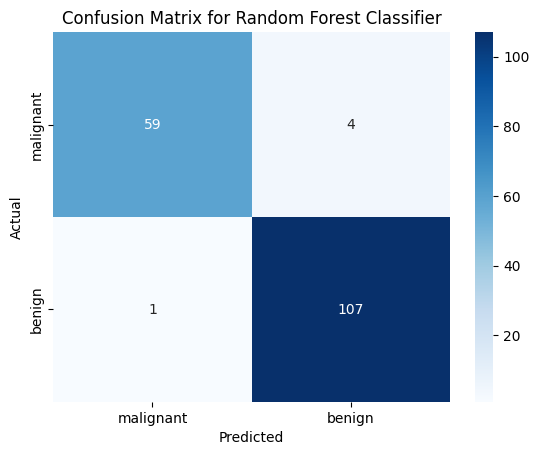

In [15]:
#35. Train a Random Forest Classifier and visualize the confusion matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and compute confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [16]:
#36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Train Stacking Classifier
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
clf.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Classifier Accuracy: 0.9766


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#37. Train a Random Forest Classifier and print the top 5 most important features
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get top 5 most important features
indices = np.argsort(clf.feature_importances_)[::-1][:5]
print("Top 5 Most Important Features:")
for idx in indices:
    print(f"{data.feature_names[idx]}: {clf.feature_importances_[idx]:.4f}")

Top 5 Most Important Features:
mean concave points: 0.1419
worst concave points: 0.1271
worst area: 0.1182
mean concavity: 0.0806
worst radius: 0.0780


In [18]:
#38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Classifier
clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                        n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate metrics
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.9633
Recall: 0.9722
F1-Score: 0.9677


In [19]:
#39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest with different max_depth values
depths = [None, 5, 10, 15]
for depth in depths:
    clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with max_depth={depth}: {accuracy:.4f}")

Accuracy with max_depth=None: 0.9708
Accuracy with max_depth=5: 0.9649
Accuracy with max_depth=10: 0.9708
Accuracy with max_depth=15: 0.9708


In [20]:
#40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Regressor with Decision Tree
reg_dt = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                          n_estimators=10, random_state=42)
reg_dt.fit(X_train, y_train)
y_pred_dt = reg_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Train Bagging Regressor with KNeighbors
reg_knn = BaggingRegressor(estimator=KNeighborsRegressor(),
                           n_estimators=10, random_state=42)
reg_knn.fit(X_train, y_train)
y_pred_knn = reg_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Print MSE for both models
print(f"Bagging Regressor (Decision Tree) MSE: {mse_dt:.4f}")
print(f"Bagging Regressor (KNeighbors) MSE: {mse_knn:.4f}")

Bagging Regressor (Decision Tree) MSE: 0.2862
Bagging Regressor (KNeighbors) MSE: 1.1216


In [21]:
#41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities and compute ROC-AUC
y_prob = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Random Forest ROC-AUC Score: {roc_auc:.4f}")

Random Forest ROC-AUC Score: 0.9968


In [22]:
#42. Train a Bagging Classifier and evaluate its performance using cross-validation
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train Bagging Classifier with cross-validation
clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                        n_estimators=100, random_state=42)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-Validation Scores: {scores}")
print(f"Average Accuracy: {np.mean(scores):.4f}")

Cross-Validation Scores: [0.89473684 0.93859649 0.99122807 0.96491228 1.        ]
Average Accuracy: 0.9579


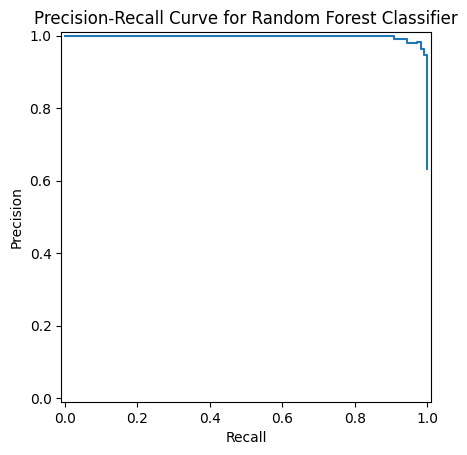

In [23]:
#43. Train a Random Forest Classifier and plot the Precision-Recall curve
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities and plot Precision-Recall curve
y_prob = clf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.show()

In [24]:
#44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base estimators
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Train Stacking Classifier
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42), cv=5)
clf.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")

Stacking Classifier Accuracy: 0.9708


In [25]:
#45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Regressor with different max_samples
max_samples = [0.5, 0.7, 1.0]
for ms in max_samples:
    reg = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                           n_estimators=10, max_samples=ms, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE with max_samples={ms}: {mse:.4f}")

MSE with max_samples=0.5: 0.2969
MSE with max_samples=0.7: 0.2952
MSE with max_samples=1.0: 0.2862
